In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["WI"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
WI 14 Ratio is 1.127
WI 15 Ratio is 1.099
WI 16 Ratio is 1.053
WI 17 Ratio is 1.005
Empirical Transfers Sum = 130331575.144


In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 25900.000


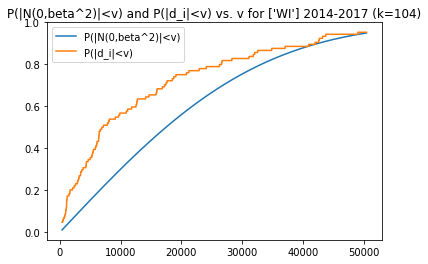

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 104
test_stat at this k = 0.11836

At the point of maximum difference with beta = 25900:
P(|d_i|<v) = 0.5385
P(|N(0,max_beta^2)|<v) = 0.2467
Difference = 0.2918




At the point of maximum difference with beta = 15900:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3249
Difference = 0.1655




At the point of maximum difference with beta = 15900:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3249
Difference = 0.1655




At the point of maximum difference with beta = 15800:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3268
Difference = 0.1636




At the point of maximum difference with beta = 15700:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3288
Difference = 0.1616




At the point of maximum difference with beta = 15600:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3308
Difference = 0.1596




At the point of maximum difference with beta = 15500:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3328
Difference = 0.1576




At the point of maximum difference with beta = 1540

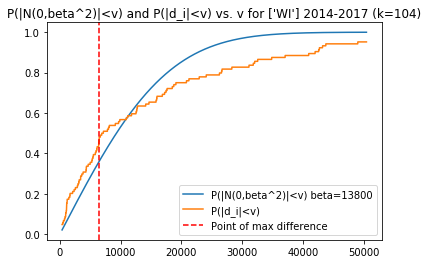

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 13800
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 8517.372
Sum sqrt(a) = 8517.372
Sum sqrt(a) = 8517.372


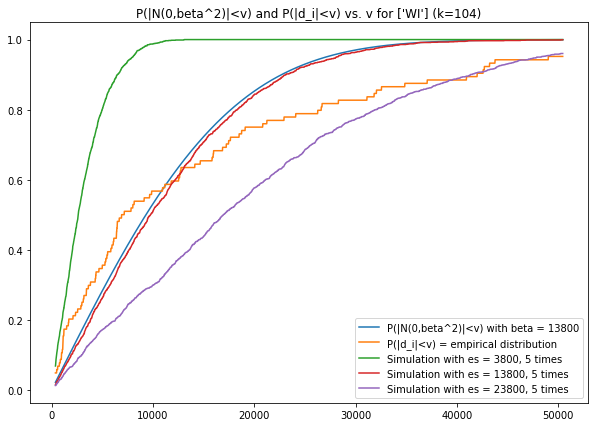

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (states, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 104
test_stat at this k = 0.11836

At the point of maximum difference with beta = 17800:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.2795
Difference = 0.2301




At the point of maximum difference with beta = 17700:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2929
Difference = 0.2071




At the point of maximum difference with beta = 17600:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.2801
Difference = 0.2295




At the point of maximum difference with beta = 17500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2872
Difference = 0.2128




At the point of maximum difference with beta = 17400:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.2885
Difference = 0.2019




At the point of maximum difference with beta = 17300:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3115
Difference = 0.1981




At the point of maximum difference with beta = 17200:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.2936
Difference = 0.1968




At the point of maximum difference with beta = 1710


At the point of maximum difference with beta = 16100:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.2885
Difference = 0.1923




At the point of maximum difference with beta = 16000:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3167
Difference = 0.1833




At the point of maximum difference with beta = 15900:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.2987
Difference = 0.1821




At the point of maximum difference with beta = 15800:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3058
Difference = 0.1942




At the point of maximum difference with beta = 15700:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3340
Difference = 0.1660




At the point of maximum difference with beta = 15600:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3071
Difference = 0.1833




At the point of maximum difference with beta = 15500:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3038
Difference = 0.1769




At the point of maximum difference with beta = 15400:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta


At the point of maximum difference with beta = 14000:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3365
Difference = 0.1442




At the point of maximum difference with beta = 13900:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3622
Difference = 0.1378




At the point of maximum difference with beta = 13800:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3558
Difference = 0.1346




At the point of maximum difference with beta = 13700:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3468
Difference = 0.1436




At the point of maximum difference with beta = 13600:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3455
Difference = 0.1353




At the point of maximum difference with beta = 13500:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3545
Difference = 0.1263




At the point of maximum difference with beta = 13400:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3833
Difference = 0.1071 NOT > test_stat
k = 104
test_stat at this k = 0.11836

At the point of maximum difference wit


At the point of maximum difference with beta = 16800:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3032
Difference = 0.2064




At the point of maximum difference with beta = 16700:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.2891
Difference = 0.2013




At the point of maximum difference with beta = 16600:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3077
Difference = 0.1827




At the point of maximum difference with beta = 16500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2949
Difference = 0.2051




At the point of maximum difference with beta = 16400:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3417
Difference = 0.1679




At the point of maximum difference with beta = 16300:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3269
Difference = 0.1731




At the point of maximum difference with beta = 16200:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3218
Difference = 0.1782




At the point of maximum difference with beta = 16100:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 13480
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000
Beta (=std): 13480
Number of T/sqrt(n) above 3 stds: 12
Proportion of T/sqrt(n) above 3 stds: 0.115
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 104
test_stat at this k = 0.11836
Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17800:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2878
Difference = 0.2122



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17700:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3154
Difference = 0.1942



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17600:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2910
Difference = 0.2090



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3179
Difference = 0.1821



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17400:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3083
Difference = 0.2013



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17300:
P(|d_i|<v) = 0.5096
P(|N(0,max_beta^2)|<v) = 0.3199
Difference = 0.1897



Sum sqrt(a) = 8517.372

At the point of maxi

Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 17000:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3006
Difference = 0.1994



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16900:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3006
Difference = 0.1897



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16800:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3026
Difference = 0.1782



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16700:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3237
Difference = 0.1667



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16600:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2962
Difference = 0.2038



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.2962
Difference = 0.2038



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16400:
P(|d

Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 16000:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3038
Difference = 0.1865



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15900:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3179
Difference = 0.1724



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15800:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3096
Difference = 0.1808



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15700:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3077
Difference = 0.1923



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15600:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3160
Difference = 0.1744



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3026
Difference = 0.1974



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15400:
P(|d

Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 15000:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3141
Difference = 0.1667



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14900:
P(|d_i|<v) = 0.4904
P(|N(0,max_beta^2)|<v) = 0.3314
Difference = 0.1590



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14800:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3212
Difference = 0.1596



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14700:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3385
Difference = 0.1423



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14600:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3250
Difference = 0.1558



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14500:
P(|d_i|<v) = 0.5000
P(|N(0,max_beta^2)|<v) = 0.3468
Difference = 0.1532



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 14400:
P(|d

Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 13500:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3404
Difference = 0.1404



Sum sqrt(a) = 8517.372

At the point of maximum difference with beta = 13400:
P(|d_i|<v) = 0.4808
P(|N(0,max_beta^2)|<v) = 0.3737
Difference = 0.1071 NOT > test_stat
E(|X|) = 91064783.457


In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 13560
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000
Beta (=std): 13560
Number of T/sqrt(n) above 3 stds: 12
Proportion of T/sqrt(n) above 3 stds: 0.115
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 13800
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000
Beta (=std): 13800
Number of T/sqrt(n) above 3 stds: 11
Proportion of T/sqrt(n) above 3 stds: 0.106
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 13480
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000
Beta (=std): 13480
Number of T/sqrt(n) above 3 stds: 12
Proportion of T/sqrt(n) above 3 stds: 0.115
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 13560
Number of T/sqrt(n) above 2 stds: 19
Proportion of T/sqrt(n) above 2 stds: 0.183
P value = 0.000000
Beta (=std): 13560
Number of T/sqrt(n) above 3 stds: 12
Proportion of T/sqrt(n) above 3 stds: 0.115
P value = 0.000000
